<a href="https://colab.research.google.com/github/Kandeo/Core-Week-9/blob/main/KNN_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Predictive Model**

**Overview** 

This project involves implementing a KNN classifier to predict survival on the Titanic. Once the experiment is conducted, the resulting metrics are to be calculated.

Experimental Procedure:

1. Downloading the dataset.
2. Randomly partitioning the dataset into two parts; 80-20 sets.
3. Computing the accuracy (percentage of correct classification).
4. Reporting the confusion matrix of the classifier.
5. Repeating step 2 to step 4 twice, each time splitting the dataset differently i.e. 70-30, 60-40, then noting the outcomes of the modeling.
6. Suggesting and applying at least one of the optimization techniques learned.
7. Providing further recommendations to improve the classifier.

Dataset: https://archive.org/download/train5_202002/train%20%285%29.csv 

# **Defining the Question**

**Specific Data Analytics Question**

Building a KNN model that determines whether a person survived the Titanic given the information provided.


**Metrics for success**

The percentage of passengers and crew members that are correctly predicted as Survived or not should be 70% and above.

**Understanding the Context**

The sinking of the Titanic is one of the most infamous shipwrecks in history. Titanic set sail from Southampton on her maiden voyage on Wednesday 10 April, 1912, calling at Cherbourg in France and Queenstown in southern Ireland before heading out across the Atlantic, on course for New York. In the early hours of April 15 1912 she struck an iceberg and was holed below the waterline. Less than three hours later she sank.

Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of more than 1,500 out of about 2,240 passengers and crew. About 706 people were rescued. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.The predictive model seeks to establish what sorts of people were more likely to survive the sink using passengers data{ Name, Age, Gender, Class}


**Experimental Design**

1. Data Preparation
 - Loading Dependencies
 - Data Uniformity
 - Handling missing/duplicate values
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Instantiating the Classifier
 - Performance evaluation
 - Hyperparameter optimization
 - Prediction
5. Performance Analysis
 - Assessing accuracy
 - Conclusions

**Data Relevance**

- **PassengerId** ~ Passenger's Id Number
- **Survived** ~ 0= Did not Survive, 1= Survived
- **PClass** ~ Ticket class: 1= First Class, 2= Second Class, 3= Third Class
- **Name** ~ Name of the passenger
- **Sex** ~ Male or Female
- **Age** ~ Age in years
- **SibSp** ~ Number of Siblings or Spouses aboard the Titanic
- **Parch** ~ Number of Parents or Children aboard
- **Ticket** ~ Passenger's ticket number
- **Fare** ~ Passenger's fare
- **Cabin** ~ Cabin number
- **Embarked** ~ Embarking point: C= Cherbourg, Q= Queenstown, S= Southampton


# **Data Preparation**

Loading dependencies

In [1]:
#Importing libraries:

#1. Data wrangling and visualization:
import pandas as pd 
import numpy as np      
import seaborn as sns   
import matplotlib.pyplot as plt

#2. Machine Learning Models:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

#3. Model Evaluation:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

#4. Removing Warnings:
import warnings
warnings.filterwarnings("ignore")


Loading the Dataset

In [2]:
#Loading the data from the csv to Pandas dataframe:
Titanic = pd.read_csv('train (5).csv')

#Printing the first 4 rows of the dataframe:
Titanic.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
#Checking the number of rows and columns:
Titanic.shape


(891, 12)

Data Uniformity

In [4]:
#Getting information about the data:
Titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing Values

In [5]:
#Checking for null entries in each column:
Titanic.isnull().sum().sort_values(ascending = False)


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Handling Missing Values

In [6]:
#1. Cabin
#Since 77% of the data in this column is missing, the column is dropped:
Titanic = Titanic.drop(columns = 'Cabin', axis = 1)
Titanic.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


In [7]:
#2. Age
#Replacing the missing values in the column with the mean:
Missing_Value = Titanic[['Age']].copy()
for i in Missing_Value:
  Titanic[i] = Titanic[i].fillna(Titanic[i].mean())


In [8]:
#3. Embarked
#Finding the mode of the column:
Titanic['Embarked'].mode()    #The mode is S

#Filling the 2 missing values with S:
Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0], inplace = True)


In [9]:
#Viewing the final information:
Titanic.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Duplicate Values

In [10]:
#Checking for duplicates:
Titanic.duplicated().sum()    #no duplicates identified


0

Checking Outliers

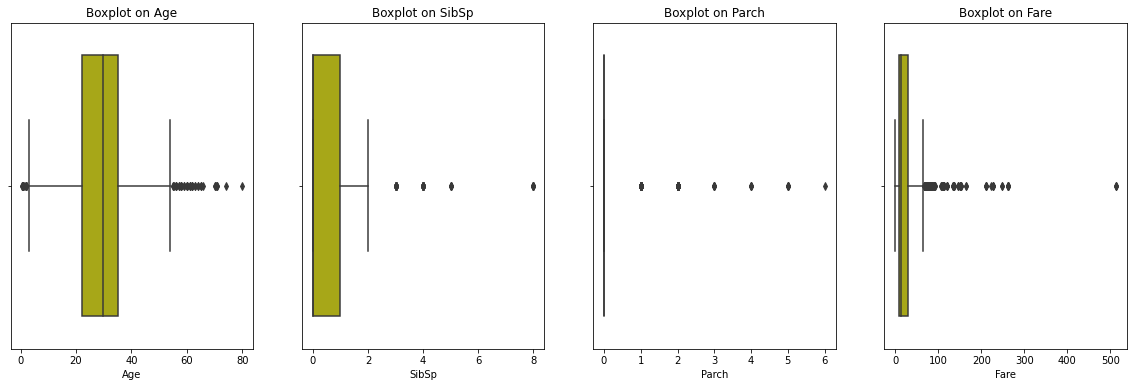

In [11]:
#Plotting a boxplot on the Age, Fare, Sibsp and Parch columns to check for outliers:
fig,axes=plt.subplots(1,4, figsize=(20,6))

#Plotting the plots:
sns.boxplot(Titanic.Age, color='y', ax=axes[0])
sns.boxplot(Titanic.SibSp, color='y', ax=axes[1])
sns.boxplot(Titanic.Parch, color='y', ax=axes[2])
sns.boxplot(Titanic.Fare, color='y', ax=axes[3])
axes[0].set_title('Boxplot on Age')
axes[1].set_title('Boxplot on SibSp')
axes[2].set_title('Boxplot on Parch')
axes[3].set_title('Boxplot on Fare')
plt.show()

Since there's no basis to assume the entries are not valid observations, no outliers are dropped

# **Exploratory Data Analysis**

This analysis involves summarizing important characteristics and trends in the data to gain better understanding.

1. **Univariate Analysis**

Describing the data in terms of:

 - Survival Ratio

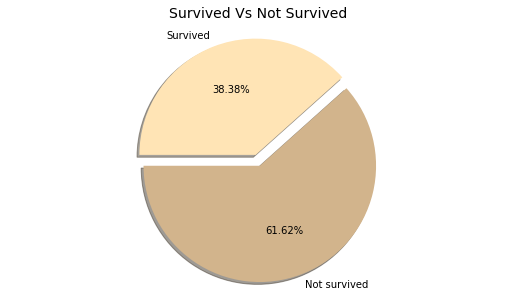

In [12]:
#Viewing the data in terms those who survived:
Survive = Titanic['Survived'].value_counts()
Survive
# Those who did not survive[0]: 549    Those who survived[1]:  342

#Visualizing the information on a pie chart:
labels= ['Not survived','Survived']
colors=['tan', 'moccasin']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("Survived Vs Not Survived", fontsize = fontsize)
plt.pie(Survive,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()



Only 38% of those aboard the Titanic survived the wreck.

 - Gender Distribution

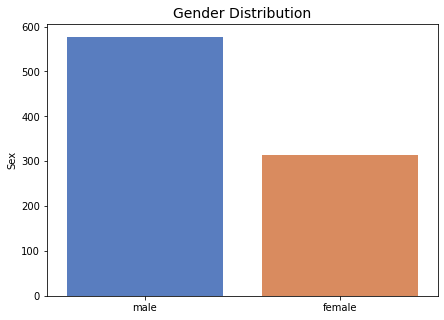

In [13]:
#To view gender distribution in the Titanic:
Gender = Titanic.Sex.value_counts()
Gender
# Males: 577       Females: 314

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Gender Distribution", fontsize = fontsize)
sns.barplot(x=Gender.index, y=Gender, palette='muted');


577 out of the 891 passengers were males.

 - P-Class distribution

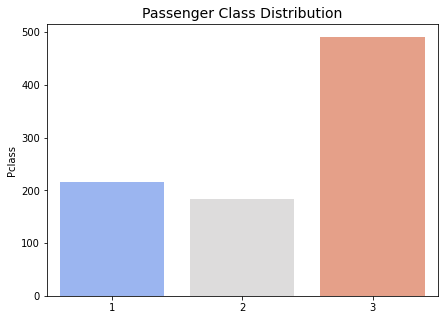

In [14]:
#Viewing the data in terms of the Passenger Class:
Class = Titanic.Pclass.value_counts()
Class
# 3: 491       1: 216       2: 184

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Passenger Class Distribution", fontsize = fontsize)
sns.barplot(x=Class.index, y=Class, palette='coolwarm');


3rd class had the highest number of passengers. This can be attributed to the fare affordability.

 - Age Distribution

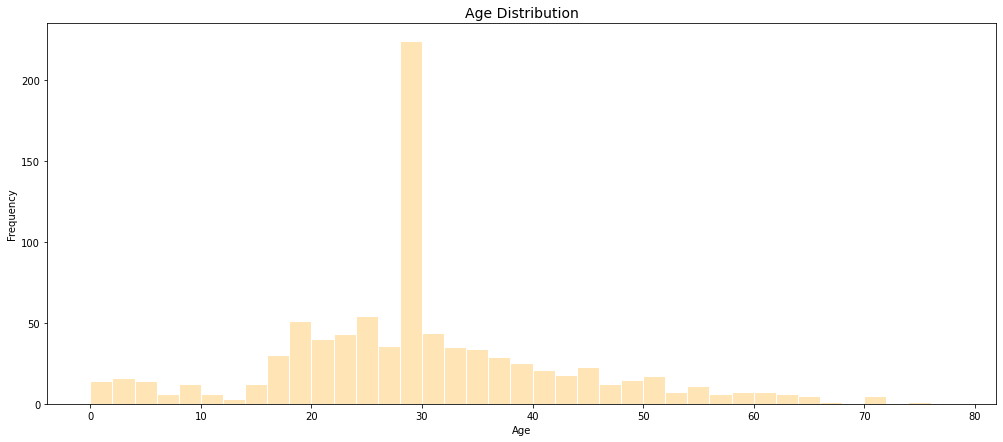

In [15]:
#Viewing the age distribution of passengers:
plt.figure(figsize= (17, 7))
fontsize = 14
plt.title('Age Distribution', fontsize = fontsize)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(Titanic.Age, bins= np.arange(0, 80, 2), color='moccasin', edgecolor='white');


Majority of those aboard the ship aged between 28 to 30 years.

 -  Distribution of Sibsp

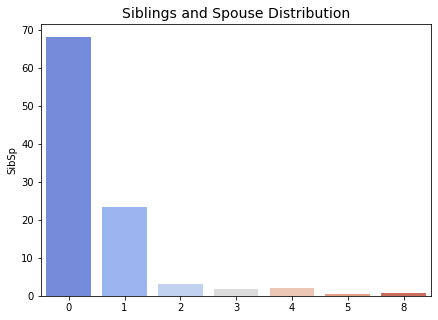

In [16]:
#To find out if majority had siblings and spouses on board:
Sibsp = Titanic['SibSp'].value_counts(normalize=True)*100
Sibsp

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Siblings and Spouse Distribution", fontsize = fontsize)
sns.barplot(x=Sibsp.index, y=Sibsp, palette='coolwarm');


Most had no siblings or spouses on board. They were travelling alone.

 - Parch Distribution

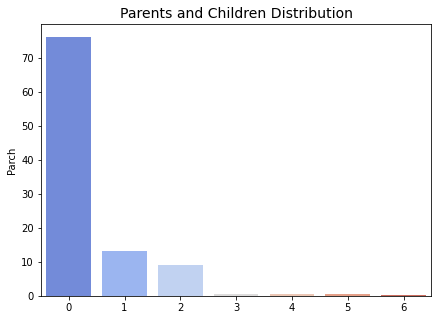

In [17]:
#To find those who had parents and children on board:
Parch = Titanic['Parch'].value_counts(normalize=True)*100
Parch

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Parents and Children Distribution", fontsize = fontsize)
sns.barplot(x=Parch.index, y=Parch, palette='coolwarm');


Most were alone. They did not have children or parents on board

 - Popular Embarkation port

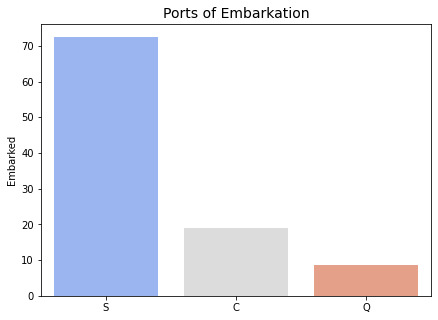

In [18]:
#To find which port had the most number of passengers:
Embark = Titanic['Embarked'].value_counts(normalize=True)*100
Embark

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Ports of Embarkation", fontsize = fontsize)
sns.barplot(x=Embark.index, y=Embark, palette='coolwarm');

Majority of the passengers embarked at city S -Southampton.

According to history, the Titanic  departed from Southampton on 10 April 1912, then stopped at Cherbourg France, and Queenstown Ireland, before heading west towards New York.

Being the departure point, majority of the passengers must have boarded from that point.

In [ ]:
#Descriptive Summary of the numerical variables:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations:**
- From the descriptive summary, feature scaling during model training is necessary due to the different ranges in the mean of the independent varibles.
- Finding out the relationship between Survival and Age, Class and Gender will help in feature selection.

2. **Bivariate Analysis**

This analysis aims to determine whether a statistical association exists between any two given variables.

 - Correlation Test

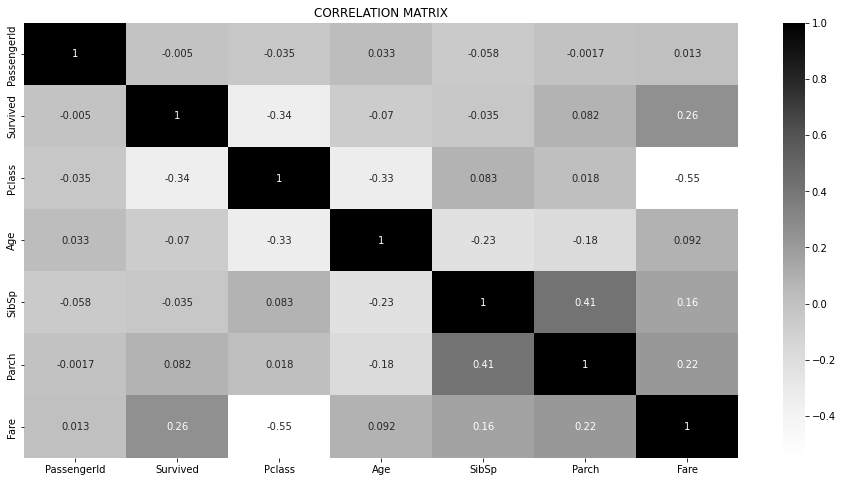

In [41]:
#To check for correlation between the variables:
plt.figure(figsize = (16, 8))
Corr = Titanic.corr()
sns.heatmap(Corr, cmap = 'Greys', annot = True)
plt.title('CORRELATION MATRIX', y=1.5)
plt.show()


From the matrix:
- Fare has a negative correlation with Pclass.
- The target column has a negative relationship with Sibp, Age and P-class
- Fare has a positive relationship with most of the attributes.



 - Survival and Passenger Class

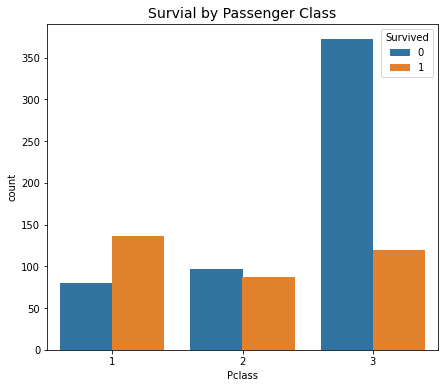

In [49]:
#To view survivors based on the passenger class:
plt.figure(figsize= (7,6))
fontsize = 14
plt.title("Survial by Passenger Class", fontsize = fontsize)
sns.countplot('Pclass', hue = 'Survived', data = Titanic); 

First class had the higest number of survivors while Third class had the highest number of deaths

 - Survival and Gender

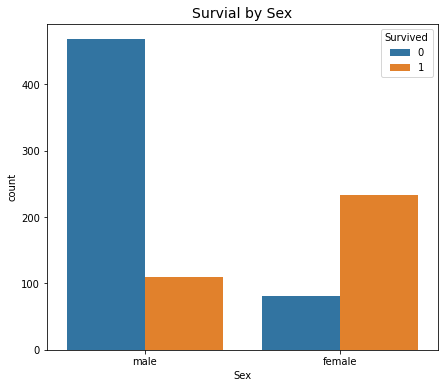

In [50]:
#To view survivors based on their Sex:
plt.figure(figsize= (7,6))
fontsize = 14
plt.title("Survial by Sex", fontsize = fontsize)
sns.countplot('Sex', hue = 'Survived', data = Titanic)

In as much as the ship had more Males than Females, the Survival rate was highest among the females. 

This can be explained with the fact that Women and Children were given priority when loading lifeboats. With that, most of the male passengers and crew were left aboard.

 - Survival and those travelling alone

In [38]:
#To find out if a passenger is travelling alone, the family size is first calculated based on SibSp and Parch:
#1. Family size
#To find the family sizes, SibSp and Parch are added together:
Titanic['Family_Size'] = Titanic['SibSp'] + Titanic['Parch'] + 1
Titanic.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2


In [39]:
#2. Travelled alone/Not alone
#To find those who travelled alone or not:

def Check(Model):
   if Model['Family_Size'] > 1 :
      return 'Not Alone'
   elif Model['Family_Size'] == 1  :
      return 'Alone'
   else:
     return "Error"

Titanic['Alone/Not_Alone'] = Titanic.apply(Check, axis=1)
Titanic.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone/Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Not Alone


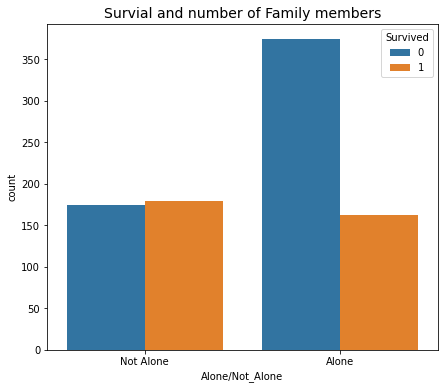

In [40]:
#To view survivors based on whether they were alone or not:
plt.figure(figsize= (7,6))
fontsize = 14
plt.title("Survial and number of Family members", fontsize = fontsize)
sns.countplot('Alone/Not_Alone', hue = 'Survived', data = Titanic)  #1 is survived

Passengers that were not alone were likely to survive than passengers who were alone.

**Observations:**
- From the analysis, a persons Sex and Passenger class influenced survival.

# **Modelling**

In [74]:
#Creating the modelling dataframe:
Model = Titanic.copy()
Model.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone/Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Not Alone


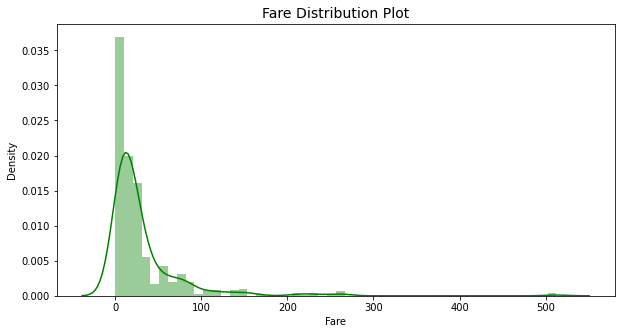

In [75]:
#Understanding the Fare distribution:
plt.figure(figsize= (10,5))
fontsize = 14
plt.title("Fare Distribution Plot", fontsize = fontsize)
sns.distplot(Model.Fare, hist=True, kde=True, color='g')

The graph is rightly skewed hence it can be converted to a normal distribution

Log Transformation

In [76]:
#Log transformation
Model['Fare'] = Model['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
Model.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone/Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,S,2,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C,2,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,S,2,Not Alone


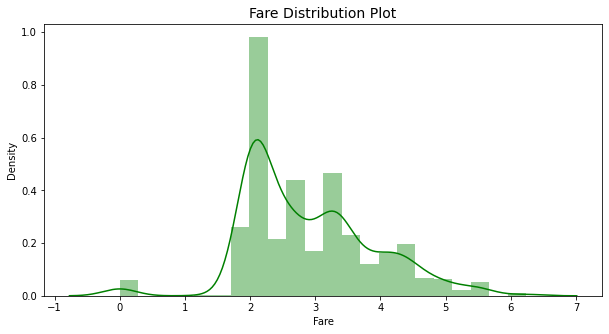

In [77]:
#Viewing the distribution after transformation
plt.figure(figsize= (10,5))
fontsize = 14
plt.title("Fare Distribution Plot", fontsize = fontsize)
sns.distplot(Model.Fare, hist=True, kde=True, color='g')

Label Encoding

In [78]:
#Encoding the Categorical Variables to a machine readable format:
Model.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2},
               'Alone/Not_Alone': {'Alone': 1, 'Not Alone': 0}}, inplace = True)
Model.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone/Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,0,2,0


In [79]:
#Dropping unnecessary observations:
Model.drop(Model.columns[[0, 3, 6, 7, 8]], axis=1, inplace = True)
Model.head(4)


,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size,Alone/Not_Alone
0,0,3,0,22.0,1.981001,0,2,0
1,1,1,1,38.0,4.266662,1,2,0
2,1,3,1,26.0,2.070022,0,1,1
3,1,1,1,35.0,3.972177,0,2,0


Feature Scaling

In [81]:
#Performing scaling on the Independent variables:
sc = StandardScaler()
Feature_Sc = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_Size', 'Alone/Not_Alone']
Model[Feature_Sc] = sc. fit_transform(Model[Feature_Sc])
Model.head(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size,Alone/Not_Alone
0,0,0.827377,-0.737695,-0.592481,-0.910717,-0.568837,0.059160,-1.231645
1,1,-1.566107,1.355574,0.638789,1.369616,1.005181,0.059160,-1.231645
2,1,0.827377,1.355574,-0.284663,-0.821904,-0.568837,-0.560975,0.811922
3,1,-1.566107,1.355574,0.407926,1.075818,-0.568837,0.059160,-1.231645


**Partitioning: 80-20**



For comparison purposes, the Logistic Regression model shall be used as the baseline model

**Logistic Regression**

In [160]:
#Separating the Features and Target:
X = Model.drop('Survived', axis=1)
y = Model['Survived']

#Splitting the data into training and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')


X_train : (712, 7)
y_train : (712,)
X_test : (179, 7)
y_test : (179,)


Building the regression model

In [161]:
#Model Selection without any hyperparameters:
Log = LogisticRegression()

#Fitting the model:
Log.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log.predict(X_test)


Performance Evaluation

In [162]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log.score(X_test, y_test):.2f}')


Train Accuracy: 0.82
Test Accuracy: 0.77


In [163]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.81      0.63      0.71        79

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.77      0.77       179

Precision Score:  0.81
Recall Score:  0.81
F1 Score:  0.71


In [164]:
#Using confusion matrix:
confusion_matrix(y_test, y_pred)


array([[88, 12],
       [29, 50]])

12 and 29 are misclassifications

**KNN Classifier**

In [165]:
#Model Selection :
Knn = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Knn.predict(X_test)

In [166]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Knn.score(X_test, y_test):.2f}')

Train Accuracy: 0.99
Test Accuracy: 0.75


The model is doing much better on the training set than on the test set hence there's overfitting.

In [167]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       100
           1       0.72      0.71      0.71        79

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

Precision Score:  0.72
Recall Score:  0.72
F1 Score:  0.71


The baseline precision and recall scores perform better compared to the Knn before optimization

In [168]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))


[[78 22]
 [23 56]]


**Hyperparameter Optimization**

Checking the best value of K

In [169]:
#To find the best K for the train and test data:
training_accuracy =[]
test_accuracy =[]

neighbors = range(1, 15)
for numbers in neighbors:
  KNN = KNeighborsClassifier(n_neighbors= numbers)
  KNN.fit(X_train, y_train)
  training_accuracy.append(KNN.score(X_train, y_train))
  test_accuracy.append(KNN.score(X_test, y_test))

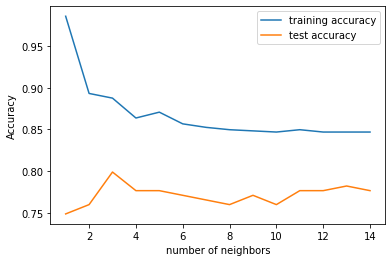

In [170]:
#Plotting the calculated accuracy levels:
plt.plot(neighbors,training_accuracy, label = 'training accuracy')
plt.plot(neighbors,test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()

From the plot, at no point does the train and test accuracies approach each other. With this a range for the K's will be set to assess the best K value

In [93]:
#To view the parameters available for tuning in the KNN classifier:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [171]:
#Creating the parameter grid:
param_grid = {'n_neighbors' : [3, 5, 7, 9, 10, 15, 20, 21],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
              'p' : [1,2]}


In [172]:
#Using the classifier along with grid search:
knn = KNeighborsClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(knn, param_grid = param_grid, cv= 10, verbose = True, n_jobs = 1, scoring = 'accuracy' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)


Fitting 10 folds for each of 384 candidates, totalling 3840 fits


If the K value comes to be odd then it’s all right else we make it odd by adding 1 to it.

In [173]:
#To view the best parameters:
best_clf.best_params_


{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

Building the Model with the best estimators

In [176]:
#Using the best parameters from hyperparameter tuning:
Final_knn = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan',
                               n_neighbors = 11, p = 1, weights = 'uniform')

#Fitting the model:
Final_knn.fit(X_train,y_train )

#Predicting values:
Y_pred = Final_knn.predict(X_test)

Performance Evaluation

In [177]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_knn.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_knn.score(X_test, y_test):.2f}')

Train Accuracy: 0.85
Test Accuracy: 0.79


In [178]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.85      0.63      0.72        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179

Precision Score:  0.85
Recall Score:  0.85
F1 Score:  0.72


In [179]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))

[[91  9]
 [29 50]]


**Observations:**

- The classifier made a total of 179 predictions.
- Out of the 179 cases, the classifier predicted did not survive 59 times and survived 120 times. In reality, there were 100 Did not survive cases and 79 survived cases.
- There were 50 true negatives and 91 true positives( cases where actual and predicted values are yes).
- There were 9 false positives and 29 false negatives. These are the total misclassifications.
- The true positive rate/recall score is 0.85. An improvement from 0.72 before tuning is performed.


**Partitioning: 70 - 30**

**Baseline Model**

In [217]:
#Creating the Variables:
X = Model.drop('Survived', axis=1)
y = Model['Survived']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (623, 7)
y_train : (623,)
X_test : (268, 7)
y_test : (268,)


In [218]:
#Model Selection without any hyperparameters:
Log2 = LogisticRegression()

#Fitting the model:
Log2.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log2.predict(X_test)

Performance Evaluation

In [219]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log2.score(X_test, y_test):.2f}')

Train Accuracy: 0.80
Test Accuracy: 0.79


In [220]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       168
           1       0.73      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Precision Score:  0.73
Recall Score:  0.73
F1 Score:  0.72


In [110]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[141  27]
 [ 28  72]]


Comparing performance to the 80-20 split, the precision and recall scores dropped from 0.81 to 0.73.

The accuracy on the other hand improved from 77% to 79%

**KNN Classifier**

In [221]:
#Model Selection :
Knn2 = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn2.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Knn2.predict(X_test)

Model Performance

In [222]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Knn2.score(X_test, y_test):.2f}')

Train Accuracy: 0.98
Test Accuracy: 0.76


In [188]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.69      0.68      0.68       100

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Precision Score:  0.69
Recall Score:  0.69
F1 Score:  0.68


In [189]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[137  31]
 [ 32  68]]


Comparing to the first partitioning, the recall and precision scores dropped from 0.72 to 0.69.


**Hyperparameter Optimization**

Checking the best value of K

In [190]:
#To find the best K for the train and test data:
training_accuracy =[]
test_accuracy =[]

neighbors = range(1, 15)
for numbers in neighbors:
  KNN = KNeighborsClassifier(n_neighbors= numbers)
  KNN.fit(X_train, y_train)
  training_accuracy.append(KNN.score(X_train, y_train))
  test_accuracy.append(KNN.score(X_test, y_test))

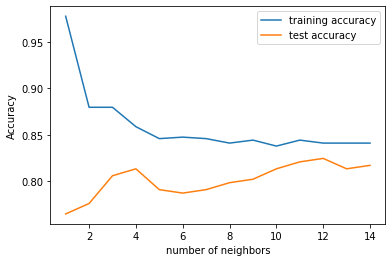

In [191]:
#Plotting the calculated accuracy levels:
plt.plot(neighbors,training_accuracy, label = 'training accuracy')
plt.plot(neighbors,test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()

The Test and Train accuracy seem to be closest when the K is 12. During tuning, the range will be set around that value

In [223]:
#Creating the parameter grid:
param_grid = {'n_neighbors' : [4, 11, 12, 13, 14, 16],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
              'p' : [1,2]}

In [224]:
#Using the classifier along with grid search:
knn = KNeighborsClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(knn, param_grid = param_grid, cv= 10, verbose = True, n_jobs = 1, scoring = 'accuracy' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [225]:
#To view the best parameters:
best_clf.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 14,
 'p': 1,
 'weights': 'uniform'}

Building the model with the best estimators

In [226]:
#Using the best parameters from hyperparameter tuning:
Final_knn2 = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean',
                               n_neighbors = 15, p = 1, weights = 'uniform')

#Fitting the model:
Final_knn2.fit(X_train,y_train )

#Predicting values:
Y_pred = Final_knn2.predict(X_test)

Model Evaluation

In [227]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_knn2.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_knn2.score(X_test, y_test):.2f}')

Train Accuracy: 0.84
Test Accuracy: 0.82


In [228]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.69      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

Precision Score:  0.79
Recall Score:  0.79
F1 Score:  0.74


In [198]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))

[[150  18]
 [ 31  69]]


**Observations:**

- The classifier made a total of 268 predictions.
- There were 69 true negatives( cases where the actual and predicted values are no) and 150 true positives
- There were 18 false positives and 31 false negatives. These are the total misclassifications.
- The true positive rate/recall score is 0.79 a drop from the first partitioning.

**Partitioning: 60 - 40**

**Baseline Model**

In [199]:
#Creating the Variables:
X = Model.drop('Survived', axis=1)
y = Model['Survived']

#Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 0)

#Printing the Shapes of the split data:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (534, 7)
y_train : (534,)
X_test : (357, 7)
y_test : (357,)


In [200]:
#Model Selection without any hyperparameters:
Log3 = LogisticRegression()

#Fitting the model:
Log3.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Log3.predict(X_test)

Performance Evaluation

In [201]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Log3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Log3.score(X_test, y_test):.2f}')

Train Accuracy: 0.81
Test Accuracy: 0.80


In [202]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       221
           1       0.76      0.68      0.72       136

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.80      0.80      0.80       357

Precision Score:  0.76
Recall Score:  0.76
F1 Score:  0.72


In [203]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[192  29]
 [ 43  93]]


Compared to the first 2 partitionings, the accuracy score is doing better with 80%

The precision and recall score is better than the 70-30 split

**KNN Classifier**

In [204]:
#Model Selection before tuning :
Knn3 = KNeighborsClassifier(n_neighbors=1)

#Fitting the model:
Knn3.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = Knn3.predict(X_test)

Performance

In [205]:
#Checking the accuracy of the test and train models:
print(f'Train Accuracy: {Knn3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Knn3.score(X_test, y_test):.2f}')

Train Accuracy: 0.98
Test Accuracy: 0.74


In [206]:
#Checking the classification report:
print(classification_report(y_test, y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, y_pred).round(2))
print('Recall Score: ', precision_score(y_test, y_pred).round(2))
print('F1 Score: ', f1_score(y_test, y_pred).round(2))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       221
           1       0.65      0.66      0.66       136

    accuracy                           0.74       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.74      0.74      0.74       357

Precision Score:  0.65
Recall Score:  0.65
F1 Score:  0.66


In [207]:
#Using confusion matrix:
print(confusion_matrix(y_test, y_pred))

[[173  48]
 [ 46  90]]


**Hyperparameter Optimization**

Checking the best value of K

In [208]:
#To find the best K for the train and test data:
training_accuracy =[]
test_accuracy =[]

neighbors = range(1, 20)
for numbers in neighbors:
  KNN = KNeighborsClassifier(n_neighbors= numbers)
  KNN.fit(X_train, y_train)
  training_accuracy.append(KNN.score(X_train, y_train))
  test_accuracy.append(KNN.score(X_test, y_test))

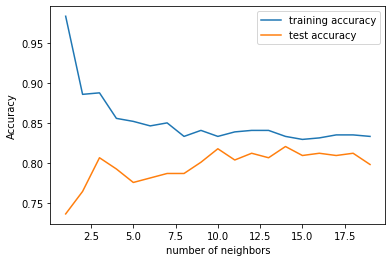

In [209]:
#Plotting the calculated accuracy levels:
plt.plot(neighbors,training_accuracy, label = 'training accuracy')
plt.plot(neighbors,test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of neighbors')
plt.legend()

The Test and Train accuracy seem to be closest when the K is between 12 and 16. During tuning, the range will be set around those value

In [210]:
#Creating the parameter grid:
param_grid = {'n_neighbors' : [10, 11, 12, 13, 14, 15, 16],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
              'p' : [1,2]}

In [211]:
#Using the classifier along with grid search:
knn = KNeighborsClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(knn, param_grid = param_grid, cv= 10, verbose = True, n_jobs = 1, scoring = 'accuracy' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


Best Parameters

In [212]:
#To view the best parameters:
best_clf.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

In [213]:
#Using the best parameters from hyperparameter tuning:
Final_knn3 = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean',
                               n_neighbors = 15, p = 1, weights = 'uniform')

#Fitting the model:
Final_knn3.fit(X_train,y_train )

#Predicting values:
Y_pred = Final_knn3.predict(X_test)

In [214]:
#Checking the Accuracy:
print(f'Train Accuracy: {Final_knn3.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Final_knn3.score(X_test, y_test):.2f}')

Train Accuracy: 0.83
Test Accuracy: 0.81


In [215]:
#Checking the classification report:
print(classification_report(y_test, Y_pred))

#Getting the Recall and Precision Scores:
print('Precision Score: ', precision_score(y_test, Y_pred).round(2))
print('Recall Score: ', precision_score(y_test, Y_pred).round(2))
print('F1 Score: ', f1_score(y_test, Y_pred).round(2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       221
           1       0.79      0.68      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357

Precision Score:  0.79
Recall Score:  0.79
F1 Score:  0.73


In [216]:
#Using confusion matrix:
print(confusion_matrix(y_test, Y_pred))

[[197  24]
 [ 44  92]]


**Observations:**

- The classifier made a total of 357 predictions.
- There were 92 true negatives and 197 true positives.
- There were 24 false positives and 44 false negatives. These are the total misclassifications.
- The true positive rate/recall score is 0.79.

# **Performance Analysis**

**Assessing Accuracy**

- When the K value is small it causes Low Bias and High variance leading to overfitting of the model. This explains why before optimization  on the KNN classifier, since the K value was set at 1 the train and test accuracies were incomparable. In all the 3 splits, the best K was an odd number, 5 and 15 for the last 2 splits 
- Comparing the Precision and Recall scores, the 80-20 split had the best scores of 0.85 making it the preferred model. The other 2 had scores of 0.79. The closer this scores are to 1, the better the model.
- Since feature importance is not direct for the KNN algorithm, there's no easy way to compute the features responsible for the classification.
- Adding training data to the model did not improve the accuracy scores rather the precision and recall scores improved. As its instance based, it adapts as new data is collected. To improve scores, a preprocessing stage can be added.

**Conclusions**


- Since KNN relies on computing distances, feature scaling before running the model is important. Features with a higher scale can have higher calculated distances and might produce poor results.
- To improve the classifier:
 - Dimensionality reduction can be performed since KNN performs best with a low number of features. Eg: Performing LDA
 - The outlier in the fare column can be dropped during preprocessing.  Since the model is sensitive to outliers, it simply chooses the neighbors based on distance criteria.